In [1]:
import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
seed = 7
cross_fold = 5
scoring = 'roc_auc' # scoring parameter
# warnings.filterwarnings('ignore')

In [2]:
def trainAndTestModel(model_name,model,X_train,Y_train, x_test,y_test):
    model.fit(X_train, Y_train)
    # mse = mean_squared_error(Y_test,model.predict(X_test))
    # print(f"{model_name}: Mean Squared Error (MSE) = {mse}")
    try:
        print(f"{model_name}: Score = {model.score(X_train, Y_train)}, Best Parameters= {model.best_params_}")
    except:
        print(f"{model_name}: Score = {model.score(X_train, Y_train)}") 

    print(f"{model_name}: Test Score = {model.score(x_test,y_test)} ")   
    return model

In [3]:
cols = ["username_sim",	"name_sim",	"loc_sim",	"bio_sim",	"website_sim",	"birthday_sim"]

dfx = pd.read_csv("dataset.csv",usecols=cols)
dfy = pd.read_csv("dataset.csv",usecols=["Label"])
x_features = dfx.values
y_labels = dfy.values
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.33, random_state=seed, stratify=y_labels)




Feature ranking:
1. feature 0 (0.643266)
2. feature 1 (0.295534)
3. feature 2 (0.030506)
4. feature 3 (0.021160)
5. feature 4 (0.005862)
6. feature 5 (0.003672)


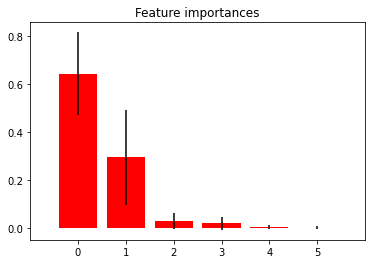

Indices of features  : [0 1 2 3 4 5]


In [4]:
num_trees = 64
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators= 24,random_state=seed)
# forest = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3, min_samples_leaf=4)
forest.fit(x_train, np.ravel(y_train))
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
print("Indices of features  :",indices)

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'criterion':["gini", "entropy"], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ExtraTreesClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring, n_jobs= -1)
model_name = "ExtraTreesClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)
# print m.score(x_test,y_test)

ExtraTreesClassifier: Score = 0.9996368243243243, Best Parameters= {'criterion': 'entropy', 'n_estimators': 4, 'random_state': 42}
ExtraTreesClassifier: Test Score = 0.9153969807100922 


In [9]:
f=np.array([0.49,0,0,0,0,1])
m.predict(f.reshape(1,-1))

array([0])